This script detects camera objects using Yolov8. After 20 seconds or after a key press the last frame is saved locally.

In case of using Yolov8 in google colab

[Google yolo tutorial](https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb#scrollTo=zR9ZbuQCH7FX)

```python
%pip install ultralytics
%pip install cvzone
import ultralytics
ultralytics.checks()
```

In [1]:
from ultralytics import YOLO
import cvzone
import time
import math
import cv2

In [2]:
model = YOLO('./yolo_model/yolov8n.pt')
class_names = model.names

In [ ]:
# Camera configuration.
# width and height depends of the quality of your cam and cpu. I'ts up to you to choose w n h.
cam = cv2.VideoCapture(0)
cam.set(3, 640) # width.
cam.set(4, 480) # Height.

time_limit = 20 # 20 seconds
inicial_time = time.time()

while True:
    success, img = cam.read()
    results = model(img, stream=True)

    for result in results:
        boxes = result.boxes

        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            # cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0,0), 3) # Con cv2.
            cvzone.cornerRect(img, (x1, y1, x2-x1, y2-y1), t=2, colorC=(255, 0, 0), colorR=(255, 0, 0))

            conf = math.ceil((box.conf[0]*100))/100
            cls = int(box.cls[0])

            cvzone.putTextRect(img,f'{class_names[cls]} {conf}', (x1, y1), scale=1.5, thickness=2, colorR=(255, 0, 0))

    cv2.imshow('image', img)

    time_elapsed = time.time() - inicial_time
    if cv2.waitKey(1) != -1 or time_elapsed >= time_limit:
        cv2.imwrite('screenshot.jpg', img)
        break
    

# Destruye las ventanas y libera la camara.
cam.release()
cv2.destroyAllWindows()

Demo

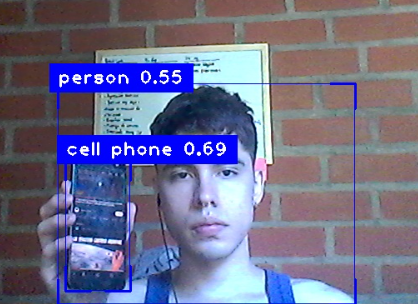